In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving List of Countries by Sugarcane Production.csv to List of Countries by Sugarcane Production (2).csv


In [ ]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [ ]:
df.shape

(103, 7)

**Data Cleaning**

In [ ]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [ ]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [ ]:
df.dropna().reset_index()
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [ ]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [ ]:
df.nunique()

,0
Country,103
Continent,6
Production(Tons),103
Production_per_person(Kg),102
Acreage(Hectare),101
Yield(Kg/Hectare),102


**Univariate Analysis**

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**How many countries produces sugercane from each continent?**

In [ ]:
df['Continent'].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

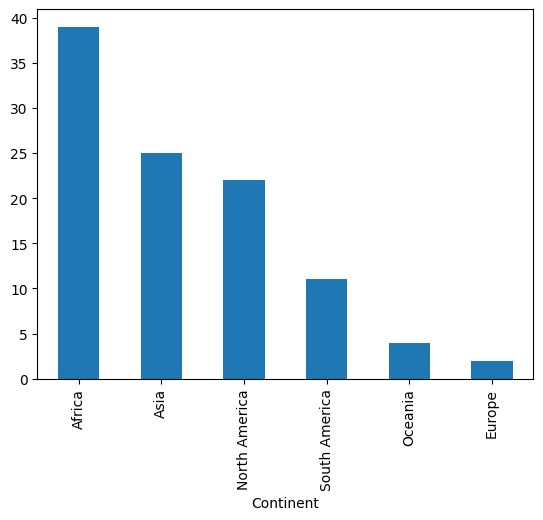

In [ ]:
df["Continent"].value_counts().plot(kind='bar')

**Distribution of Columns**

<ipython-input-138-da421447ddc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
<ipython-input-138-da421447ddc7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
<ipython-input-138-da421447ddc7>:7: UserWarning: 

`distplot` is a deprecat

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

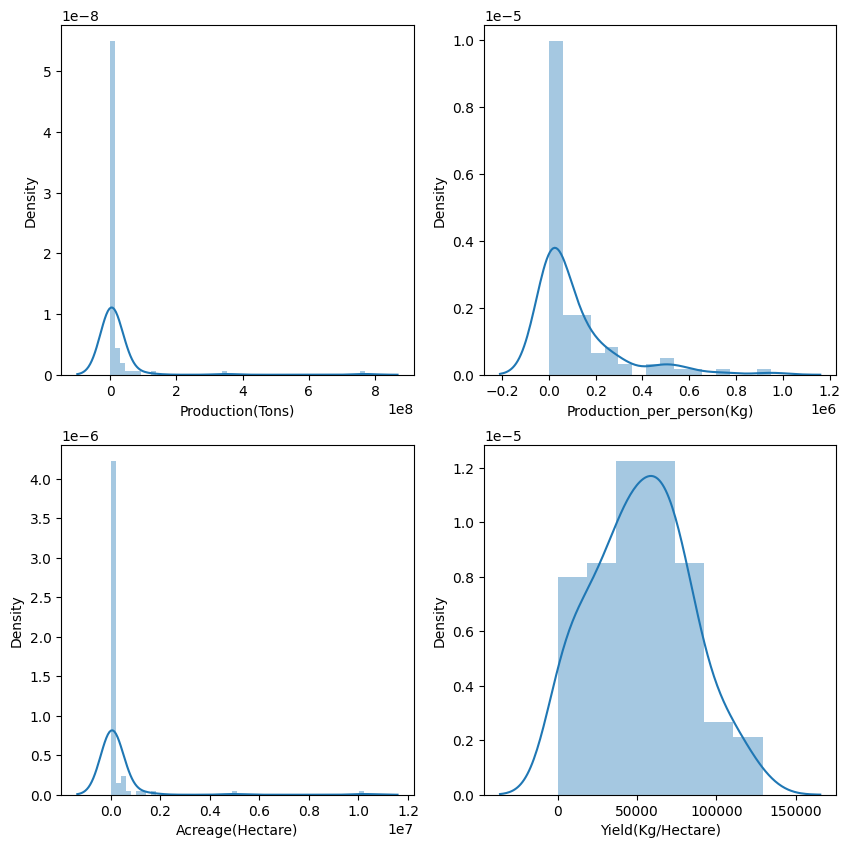

In [ ]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

**Checking Outliers**

<Axes: ylabel='Yield(Kg/Hectare)'>

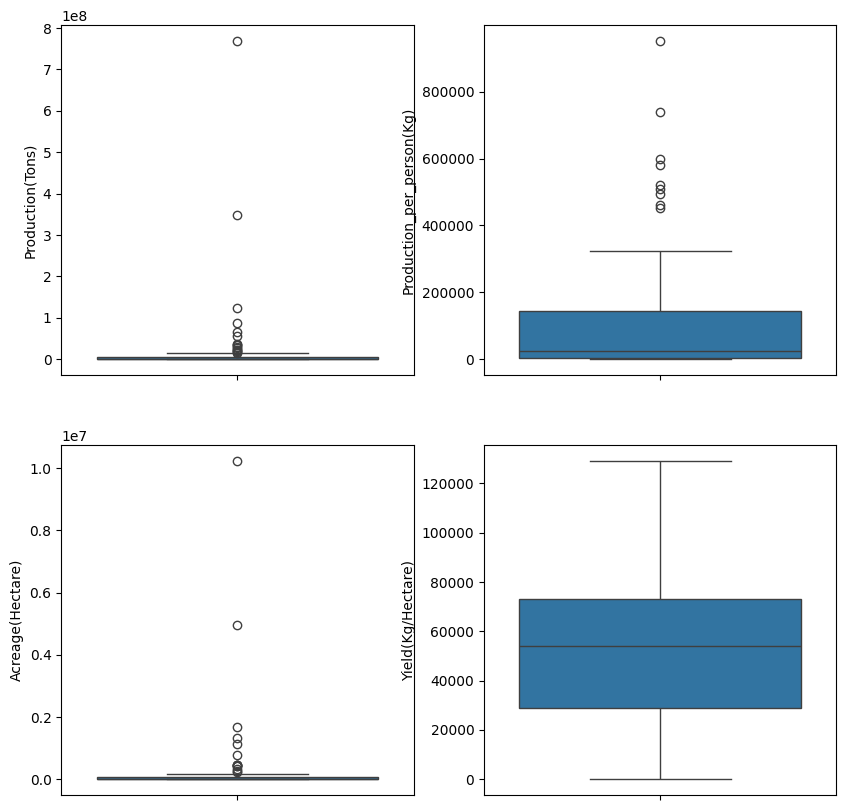

In [ ]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [ ]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


**Bivariate Analysis**

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**Which country produces maximum sugercane?**

In [ ]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [ ]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [ ]:
df_new['Production(Tons)_percent'] = df_new["Production(Tons)"]*100/df_new['Production(Tons)'].sum()

In [ ]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

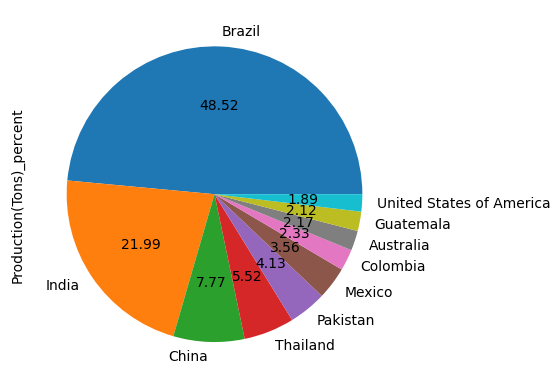

In [ ]:
df_new['Production(Tons)_percent'].head(10).plot(kind = 'pie',autopct='%.2f')

<Axes: xlabel='Country'>

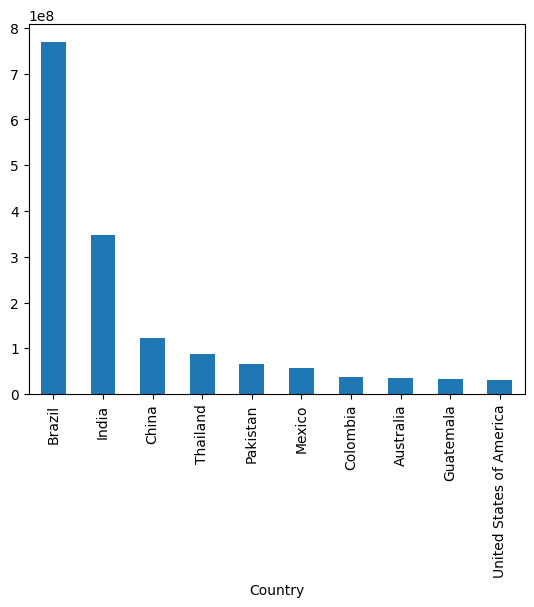

In [ ]:
df_new['Production(Tons)'].head(10).plot(kind = 'bar')

<ipython-input-148-50992a0c7b8b>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


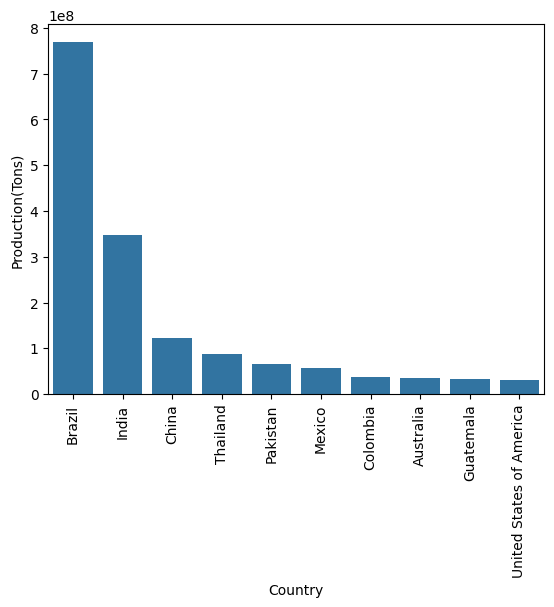

In [ ]:
ax = sns.barplot(data = df.head(10), x ='Country',y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


**Which Country has highest land?**

<ipython-input-150-fff04608626f>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


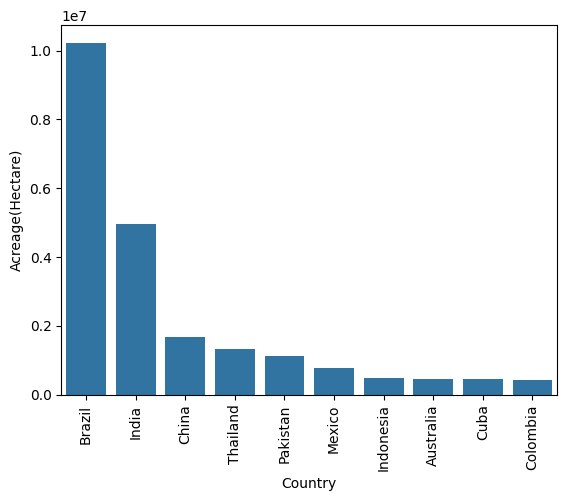

In [ ]:
df_acr = df.sort_values('Acreage(Hectare)', ascending = False)
ax = sns.barplot(data = df_acr.head(10), x ='Country',y = 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**Which country has highest yield per hectare?**

<ipython-input-151-23957a0abdf6>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


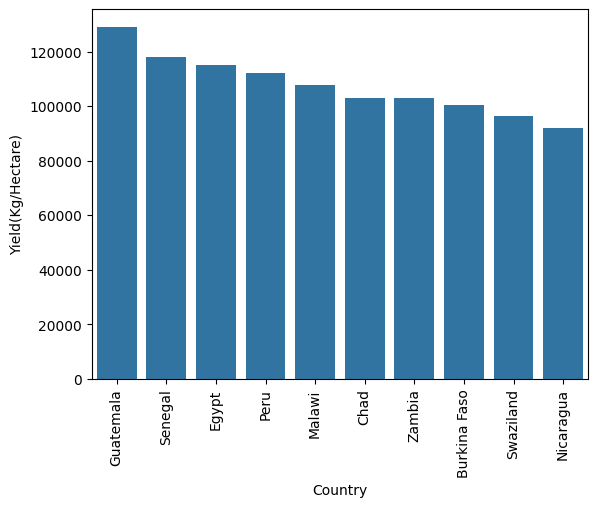

In [ ]:
df_yield = df.sort_values('Yield(Kg/Hectare)', ascending = False)
ax = sns.barplot(data = df_yield.head(10), x ='Country',y = 'Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**Which country has highest Production_per_person(Kg)?**

<ipython-input-152-721ff5ceccea>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


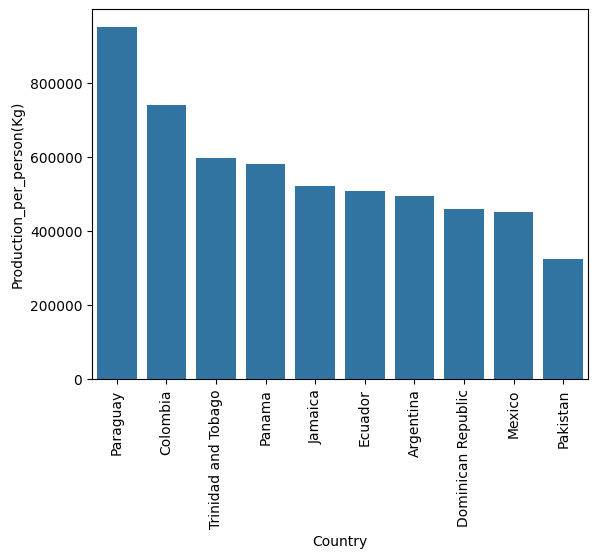

In [ ]:
df_ppp = df.sort_values('Production_per_person(Kg)', ascending = False)
ax = sns.barplot(data = df_ppp.head(10), x ='Country',y = 'Production_per_person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**Correlation**



In [ ]:
columns_to_analyze=['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']
df[columns_to_analyze].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

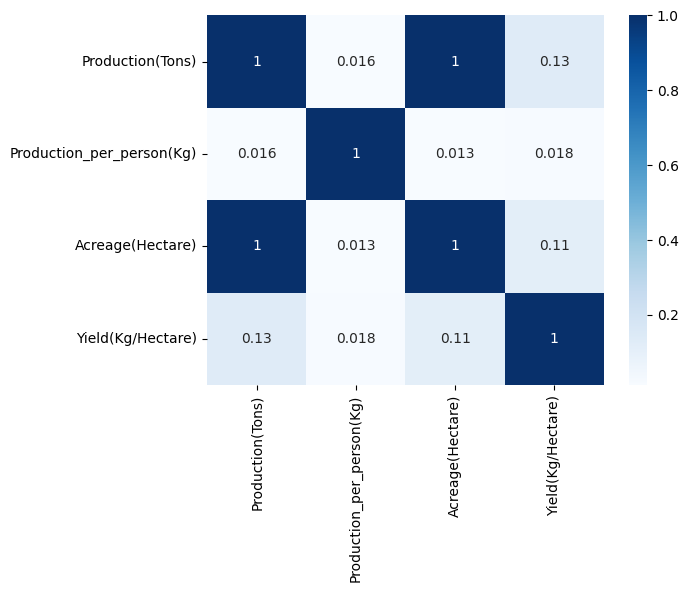

In [ ]:
sns.heatmap(df[columns_to_analyze].corr(), annot = True, cmap ='Blues')

**Do countries with highest land produce more sugarcane?**

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

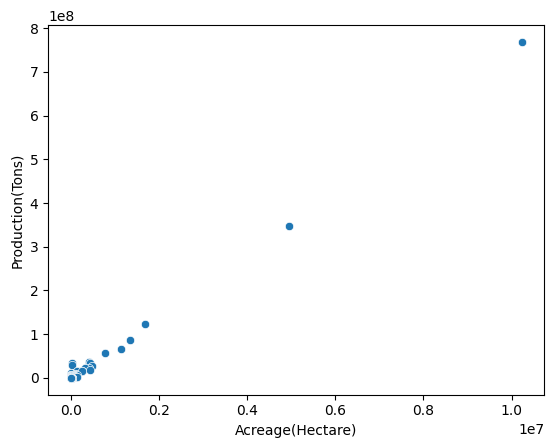

In [ ]:
sns.scatterplot(data= df, x ='Acreage(Hectare)', y ='Production(Tons)') # answer = yes

**Do countries which yield more sugarcane per hectare produces more sugarcane in total?**

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

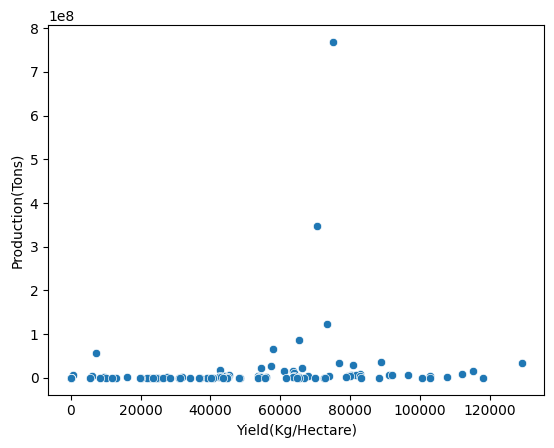

In [ ]:
sns.scatterplot(data= df, x ='Yield(Kg/Hectare)', y ='Production(Tons)') #so answer is no

**Analysis for continent**

In [ ]:
df_continent = df.groupby('Continent').sum()
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


**Which continent produces maximum sugarcane?**

<Axes: xlabel='Continent'>

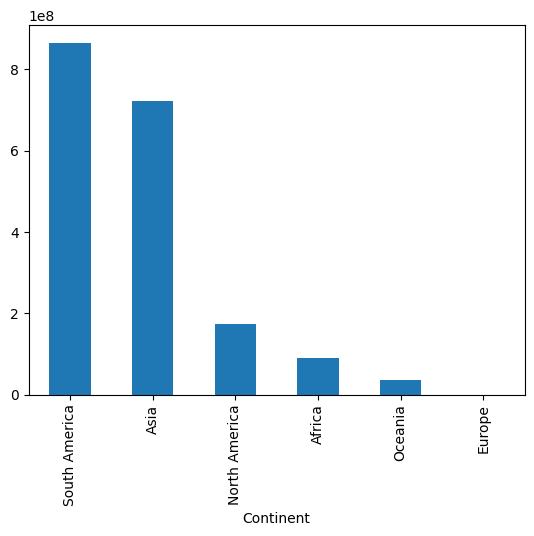

In [ ]:
df_continent['Production(Tons)'].sort_values(ascending= False).plot(kind="bar")

**Which continent has the highest land for the production of Sugarcane?**

<Axes: xlabel='Continent'>

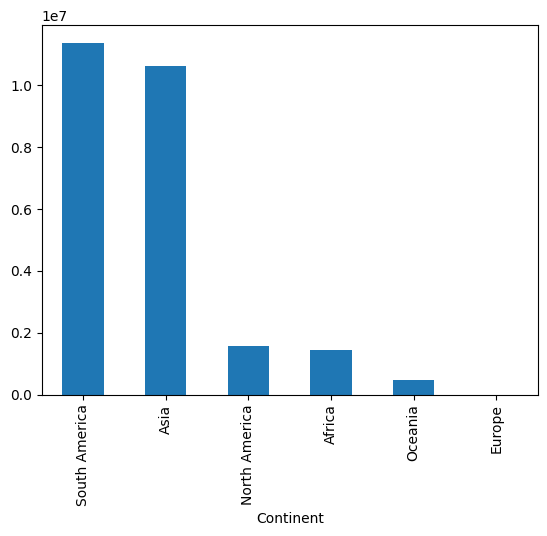

In [ ]:
df_continent['Acreage(Hectare)'].sort_values(ascending= False).plot(kind="bar")

**Do number of countries in a Continent effects production of sugarcane?**

In [ ]:
df_continent['number_of_countries'] = df.groupby('Continent').count()['Country']
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


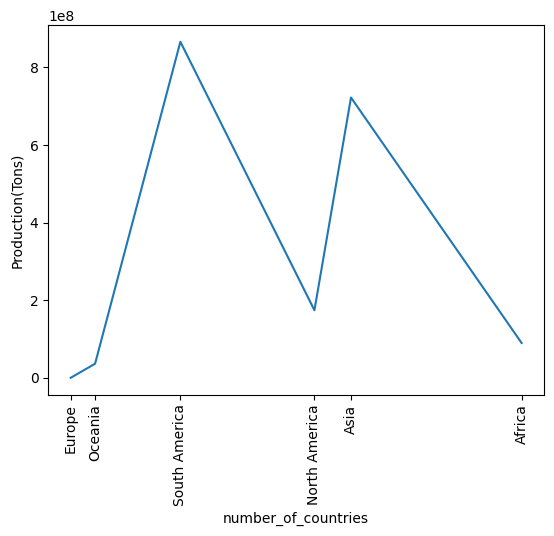

In [ ]:
continent_name = df_continent.index.to_list()
sns.lineplot(data = df_continent, x ='number_of_countries',y='Production(Tons)')
plt.xticks(df_continent['number_of_countries'], continent_name, rotation = 90)
plt.show()

**Production distribution by continent**

<Axes: ylabel='Production(Tons)'>

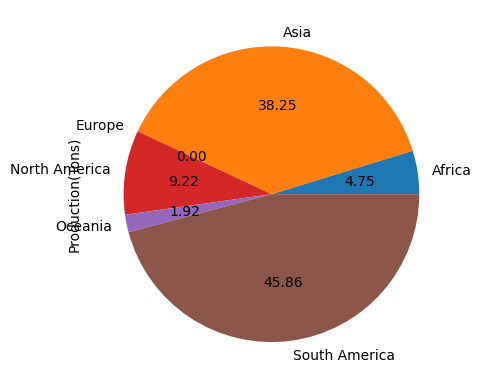

In [ ]:
df_continent['Production(Tons)'].plot(kind= 'pie', autopct = "%.2f")

**Correlation for Continent**

In [ ]:
df_continent.corr()

ValueError: could not convert string to float: "EgyptSouth AfricaKenyaSwazilandSudanZambiaMauritiusUgandaZimbabweMadagascarTanzaniaMalawiMozambiqueCongo-KinshasaCôte d'IvoireEthiopiaNigeriaCameroonSenegalCongo-BrazzavilleAngolaBurkina FasoChadMoroccoMaliGuineaGabonLiberiaBurundiNigerSomaliaGhanaCentral African RepublicRwandaSierra LeoneCape VerdeBeninGuinea-BissauDjibouti"